# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


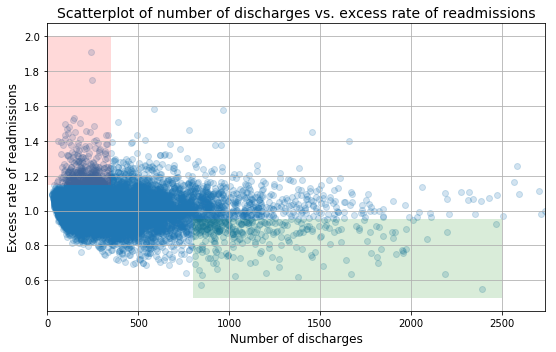

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)


ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

Overall, I can not agree with the conclusions of the above analysis. While the scatter plot does seem to hint that there is a downward trend, it is really impossible to draw conclusions from the visual alone when the majority of data points are obscured by others. The cherry-picking of segments in the red and green areas seems arbitrary as well. As far as the given conclusions go, logically they should be interpreted as hypotheses to be tested rather than conclusions. The guess about resources and quality of care is a non sequitor and should be left out. As for the recommendations, there is a discrepancy between the definition of what a "small" hospital is, discrediting the analysis. Beyond that, the recommendations are interesting considerations, but many other factors should be taken into account beyond readmission rate in order to evaluate them, such as environmental, geographical, and costs.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

First some exploratory data analysis. The following chart adds a line of best fit.

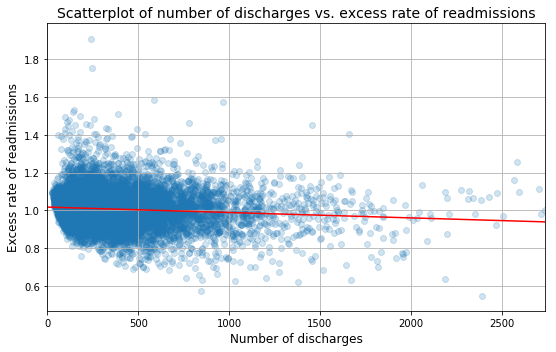

In [5]:
# same plot as above
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

## adding a line of best fit
xlim = np.array([0, max(x)])
sample_slope, sample_intercept = np.polyfit(x, y, 1)
plt.plot(xlim, xlim * sample_slope + sample_intercept, color="red")

ax.set_xlim(xlim)
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [6]:
print("Regression Slope:", sample_slope * 100)

Regression Slope: -0.00285650529438


Polyfitting the sample data with a linear regression yields a negative slope of -2.86e-05 or a -0.2% decrease in readmission rate per 100 discharges. The sample data also A superficial examination of the chart does warrant the examination of the correlation, but not a conclusion by its own right.


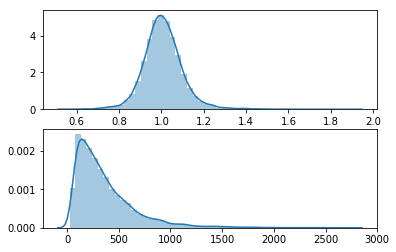

In [7]:
# Examining distribution w/ interest in normality
plt.figure(1)
plt.subplot(211)
sns.distplot(y)
plt.subplot(212)

sns.distplot(x)
plt.show()

In [8]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

print("Normal Test: Readmission Rate P-Value", stats.normaltest(reject_outliers(np.array(y)))[1])
print("Normal Test: Discharge Count P-Value", stats.normaltest(reject_outliers(np.array(x)))[1])

Normal Test: Readmission Rate P-Value 6.30871454628e-18
Normal Test: Discharge Count P-Value 9.06199571246e-272


Unfortunately, both variables fail the normal test with miniscule p-values. Therefore, the Pearson product-moment correlation coefficients is not available as an evaluation statistic. Instead of directly testing the linear relationship with the Pearson coefficient, the monotonic relationship will be tested with the Spearman coefficient. 

Null Hypothesis: There is no correlation between number of discharges and excess readmission 

Alternative Hypothesis: There is correlation between number of discharges and excess readmission 

99% Confidence; 0.01 significance

Test Statistic: Spearman Correlation Coefficient

In [9]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.076858037232686291, pvalue=1.5672494791925574e-16)

The SciPy library does the heavy lifting and finds a negligible correlation of -0.076 with a p-value of 1.56e-16. Since this p value is less than the significance value, the Null Hypothesis is rejected and the correlation, while miniscule, is determined to be statistically significant.

The statistical indicates the existence of the correlation between hospital size and readmittance rate. The practical significance, however, has to do with quality of care and allocation of Medicare funds. Practically speaking, the relationship is so small, that any actions taken based on this data alone should be very minimal.

My recommendation to the client would not be to decide how to fund and allow hospitals based on readmittance rate. Even if smaller hospitals cannot provide the same quality of care, they are often the quickest option for ambulance-riding patients who don't have time to drive into the big city for the bigger hospital. Furthermore, reducing funding for underperforming hospitals will not solve the problem of underperformance -- perhaps only exacerbate it.

The original scatter plot succeeds in showing a large quantity of data in a single glance, as well as hint at a correlation. Its efficacy is weakened by outliers that cause points nearer the median to be obscured with larger datasets like this one. To supplement a scatter plot, a series of box plots or violin plots would be effective.


    Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
    
    
    Look at the scatterplot above.
        What are the advantages and disadvantages of using this plot to convey information?
        Construct another plot that conveys the same information in a more direct manner.


In [15]:
clean_hospital_read_df['Number of Discharges'].quantile([0.25,.5,.75,1])

0.25     157.00
0.50     280.00
0.75     472.75
1.00    6793.00
Name: Number of Discharges, dtype: float64

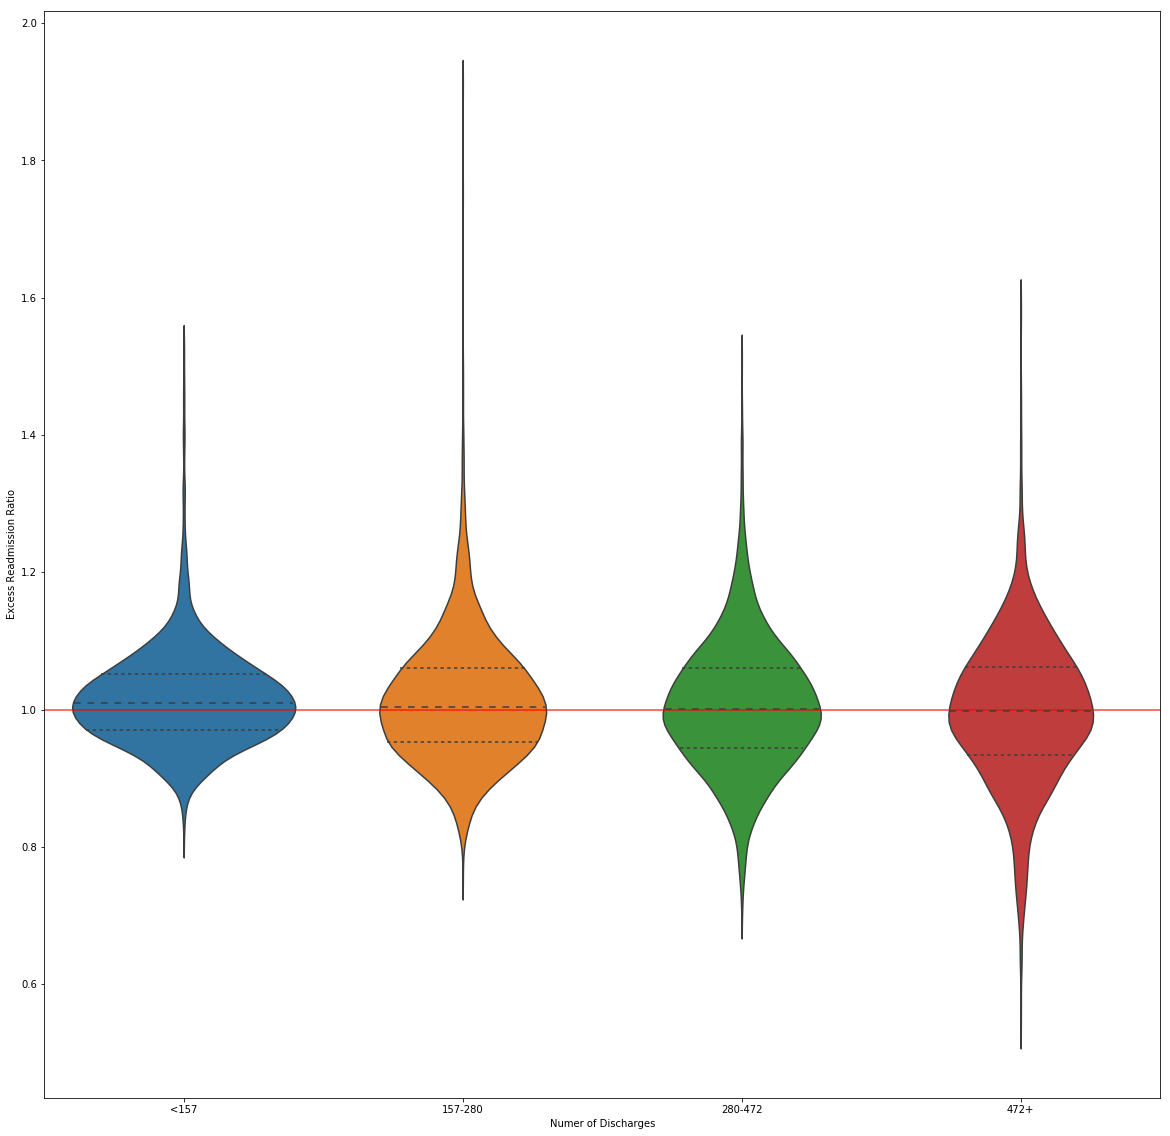

In [17]:
# group labels
bins = [0,157,280,472,1000000]
group_bins = ['<157','157-280','280-472','472+']
clean_hospital_read_df['Hospital Size'] = pd.cut(clean_hospital_read_df['Number of Discharges'], bins, labels=group_bins)
plt.figure(figsize=(20,20))

#Plot violinplot with pointplot overlayed
sns.violinplot(data=clean_hospital_read_df, x='Hospital Size', y='Excess Readmission Ratio', inner="quartile")
plt.hlines(xmin=-1, xmax=4, y=1, color="red", alpha=0.75)

plt.xlabel('Numer of Discharges')
plt.ylabel('Excess Readmission Ratio')

plt.show()

In [18]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 13 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
Hospital Size                 11497 non-null category
dtypes: category(1), float64(5), int32(1), int64(1), object(5)
memory usage: 1.4+ MB
